In [1]:
import pandas as pd
import os
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

os.chdir("P:\Courses\MMA 823 - Financial Markets\Project")

In [2]:
df1=pd.read_csv("2014_Financial_Data.csv")
df2=pd.read_csv("2015_Financial_Data.csv")
df3=pd.read_csv("2016_Financial_Data.csv")
df4=pd.read_csv("2017_Financial_Data.csv")
df5=pd.read_csv("2018_Financial_Data.csv")

In [3]:
df1['Year']=2014
df2['Year']=2015
df3['Year']=2016
df4['Year']=2017
df5['Year']=2018

In [4]:
df1.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 226 entries, Unnamed: 0 to Year
dtypes: float64(222), int64(2), object(2)
memory usage: 6.6+ MB


In [6]:
df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df2.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df3.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df4.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df5.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)


In [7]:
frames = [df1, df2, df3, df4, df5]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 226 entries, Company_name to Year
dtypes: float64(222), int64(2), object(2)
memory usage: 38.2+ MB


In [10]:
data.head()

,Company_name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR%,Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014


In [11]:
# Data missing information 
data_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Company_name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR%,Class,Year
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,object,float64,int64,int64
null values (nb),0,1171,2088,1771,1207,2138,1669,1702,1101,1719,...,2427,2387,2864,2615,2479,2422,0,0,0,0
null values (%),0,5.30416,9.45781,8.02192,5.46723,9.68429,7.5599,7.70938,4.98709,7.78638,...,10.9933,10.8122,12.9728,11.8449,11.2289,10.9707,0,0,0,0


In [12]:
data.dtypes

Company_name             object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
SG&A Expenses Growth    float64
Sector                   object
PRICE_VAR%              float64
Class                     int64
Year                      int64
Length: 226, dtype: object

In [13]:
data.fillna(0,inplace=True)

In [14]:
# Data missing information 
#data_info1=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
#data_info1=data_info1.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
#data_info1=data_info1.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
#                         rename(index={0:'null values (%)'}))
#display(data_info1)
data.isnull().sum().sum()

0

In [15]:
#dummies = pd.get_dummies(data.Sector, dtype=np.int64)

In [16]:
#data1 = pd.concat([data, dummies], axis=1)

In [17]:
# Train Year: 2014 - 2016
# Test Year:  2017 - 2018
#all_year = set(data1['Year'].unique())
#test_year = set(range(2017,2018,1))
#train_year = all_year - test_year

#len(train_year), len(test_year), len(all_year)

#train = data1[data1['Year'].isin(train_year)]
#test = data1[data1['Year'].isin(test_year)]

#train['Class'].value_counts()

#class_ratio = len(train[train['Class']==1]) / len(train.index)
#class_ratio

#len(test) / len(data1)
#len(train) / len(data1)

In [16]:
# Train Year: 2014 - 2016
# Test Year:  2017 - 2018
all_year = set(data['Year'].unique())
test_year = set(range(2017,2018,1))
train_year = all_year - test_year

len(train_year), len(test_year), len(all_year)

train = data[data['Year'].isin(train_year)]
test = data[data['Year'].isin(test_year)]

train['Class'].value_counts()

class_ratio = len(train[train['Class']==1]) / len(train.index)
class_ratio

len(test) / len(data)
len(train) / len(data)

(4, 1, 5)

1    10789
0     6328
Name: Class, dtype: int64

0.6303090494829702

0.224668206730987

0.775331793269013

In [17]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data1, data1['Class'], test_size=0.3, random_state=42)
data.drop(['Year', 'Sector','PRICE_VAR%', 'Company_name'], axis=1, inplace=True)
train.drop(['Year', 'Sector','PRICE_VAR%', 'Company_name'], axis=1, inplace=True)
test.drop(['Year', 'Sector','PRICE_VAR%', 'Company_name'], axis=1, inplace=True)

C:\Users\PRIYA\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
test2=test.copy()

In [19]:
test2.drop('Class', axis=1,inplace=True)

In [20]:
test.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Class'],
      dtype='object', length=222)

In [21]:
test2.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '10Y Dividend per Share Growth (per Share)',
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth'],
      dtype='object', length=221)

In [22]:
data.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Class'],
      dtype='object', length=222)

In [23]:

from pycaret.classification import *
classification_setup = setup(data= train, target='Class',remove_outliers=True,normalize=True, remove_multicollinearity=True ,normalize_method='robust',
                            feature_selection=True ,silent = True,session_id = 6563)

Setup Succesfully Completed!


,Description,Value
0,session_id,6563
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(17117, 222)"
4,Missing Values,False
5,Numeric Features,220
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6625,0.6962,0.8439,0.6901,0.7592,0.2136,0.2261,41.6358
1,Light Gradient Boosting Machine,0.6583,0.6897,0.8294,0.6908,0.7537,0.2107,0.2204,2.8342
2,Gradient Boosting Classifier,0.6588,0.6864,0.8650,0.6806,0.7617,0.1902,0.2081,31.7509
3,Extreme Gradient Boosting,0.6487,0.6697,0.7955,0.6929,0.7406,0.2043,0.2090,9.1912
4,Ada Boost Classifier,0.6507,0.6649,0.8289,0.6841,0.7495,0.1897,0.1996,6.7076
5,Extra Trees Classifier,0.6450,0.6621,0.8176,0.6824,0.7439,0.1808,0.1888,2.1689
6,Random Forest Classifier,0.6223,0.6433,0.7021,0.6999,0.7009,0.1883,0.1884,0.4729
7,Linear Discriminant Analysis,0.6351,0.6204,0.9455,0.6433,0.7657,0.0609,0.0944,0.2864
8,Quadratic Discriminant Analysis,0.4392,0.5972,0.1905,0.7042,0.2994,0.0430,0.0693,0.1238
9,K Neighbors Classifier,0.6053,0.5833,0.7577,0.6639,0.7076,0.1084,0.1107,0.5331


In [24]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6538,0.6879,0.8325,0.6857,0.7520,0.1963,0.2067
1,0.6629,0.6936,0.8390,0.6919,0.7584,0.2180,0.2293
2,0.6508,0.6753,0.8341,0.6825,0.7507,0.1867,0.1975
3,0.6504,0.6767,0.8194,0.6865,0.7471,0.1953,0.2035
4,0.6616,0.6967,0.8194,0.6968,0.7532,0.2262,0.2338
5,0.6545,0.6829,0.8097,0.6934,0.7470,0.2123,0.2188
6,0.6717,0.7137,0.8355,0.7009,0.7623,0.2449,0.2549
7,0.6707,0.6908,0.8438,0.6977,0.7638,0.2360,0.2480
8,0.6596,0.6781,0.8277,0.6927,0.7542,0.2144,0.2236
9,0.6575,0.6966,0.8309,0.6898,0.7538,0.2068,0.2167


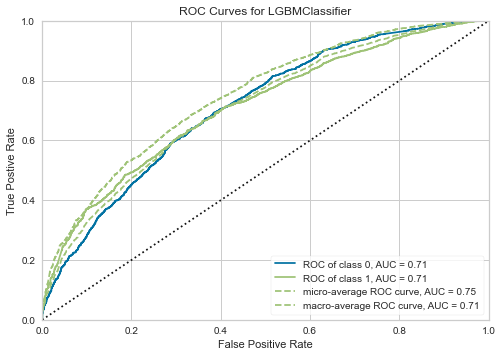

In [25]:
plot_model(lgbm_model)

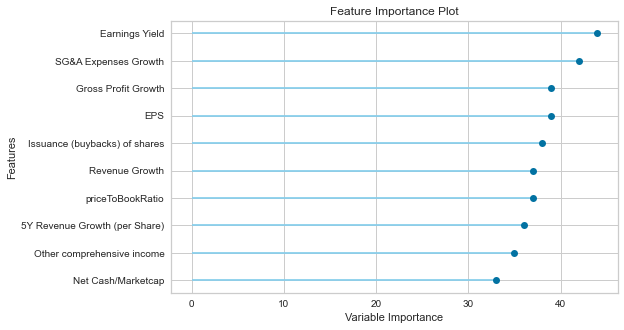

In [26]:
plot_model(estimator = lgbm_model, plot = 'feature')

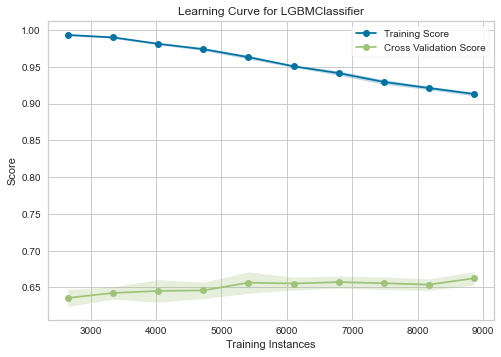

In [27]:
plot_model(estimator = lgbm_model, plot = 'learning')

In [28]:
pred_lgbm = predict_model(lgbm_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6741,0.7124,0.8477,0.6992,0.7664,0.2438,0.2565


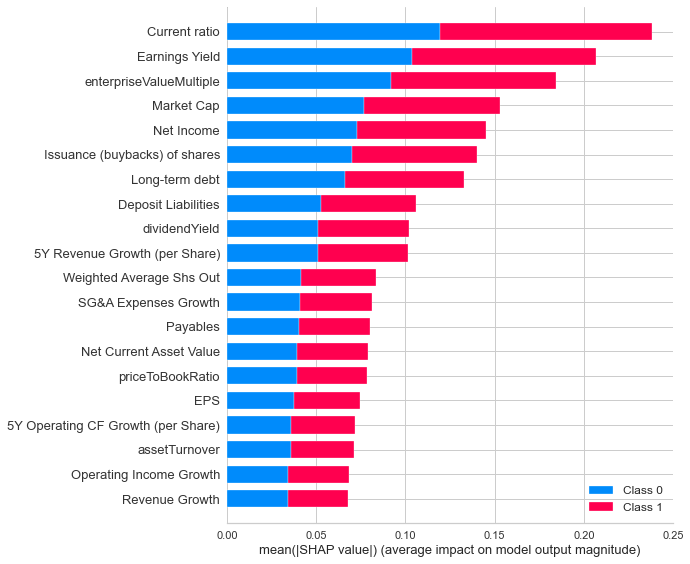

In [29]:
interpret_model(lgbm_model)

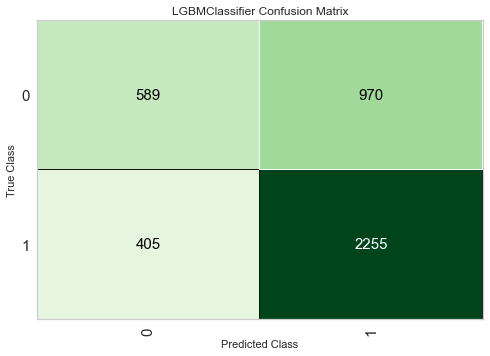

In [30]:
plot_model(estimator = lgbm_model, plot = 'confusion_matrix')

In [31]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6563, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [32]:
cb_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6589,0.7006,0.8454,0.6863,0.7576,0.2027,0.2156
1,0.6508,0.6962,0.8390,0.6810,0.7518,0.1837,0.1954
2,0.6640,0.6772,0.8406,0.6923,0.7593,0.2198,0.2315
3,0.6616,0.6832,0.8565,0.6852,0.7613,0.2041,0.2197
4,0.6738,0.7009,0.8306,0.7045,0.7624,0.2532,0.2621
5,0.6931,0.7155,0.8581,0.7131,0.7789,0.2909,0.3046
6,0.6728,0.7321,0.8548,0.6955,0.7670,0.2365,0.2512
7,0.6697,0.6811,0.8470,0.6958,0.7640,0.2313,0.2441
8,0.6636,0.6889,0.8422,0.6918,0.7596,0.2171,0.2291
9,0.6575,0.7009,0.8470,0.6849,0.7574,0.1969,0.2102


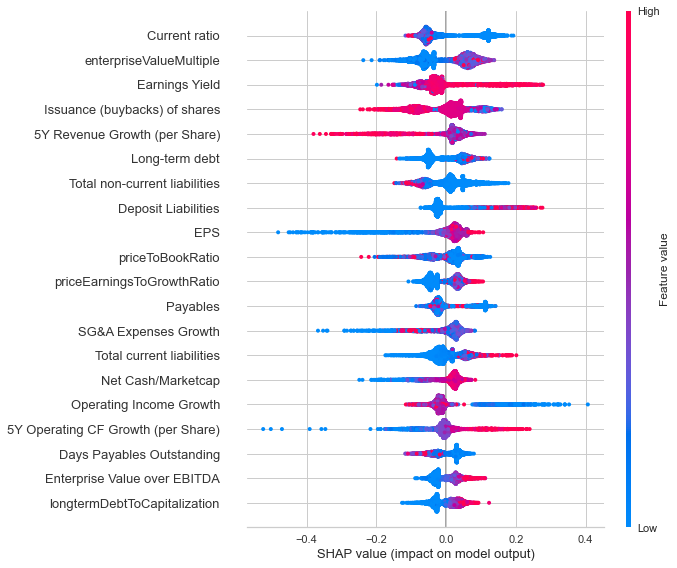

In [33]:
interpret_model(cb_model)

In [34]:
pred_cb = predict_model(cb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6786,0.7124,0.8658,0.6975,0.7726,0.246,0.2633


In [ ]:
best=automl(use_holdout=True)

In [ ]:
best

In [26]:
et_model=create_model(estimator='et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6467,0.6640,0.8261,0.6813,0.7467,0.1803,0.1897
1,0.6447,0.6693,0.8213,0.6809,0.7445,0.1776,0.1862
2,0.6386,0.6632,0.8164,0.6769,0.7401,0.1635,0.1714
3,0.6504,0.6571,0.8210,0.6860,0.7474,0.1943,0.2028
4,0.6524,0.6672,0.8097,0.6915,0.7459,0.2067,0.2133
5,0.6535,0.6828,0.8274,0.6867,0.7505,0.1989,0.2084
6,0.6362,0.6918,0.8145,0.6751,0.7383,0.1584,0.1661
7,0.6535,0.6526,0.8213,0.6892,0.7494,0.2014,0.2097
8,0.6392,0.6493,0.8052,0.6812,0.7380,0.1716,0.1779
9,0.6545,0.6847,0.8277,0.6881,0.7515,0.2003,0.2097


In [ ]:
interpret_model(et_model)

In [27]:
pred_et = predict_model(et_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6596,0.6813,0.8252,0.6933,0.7535,0.2169,0.2257


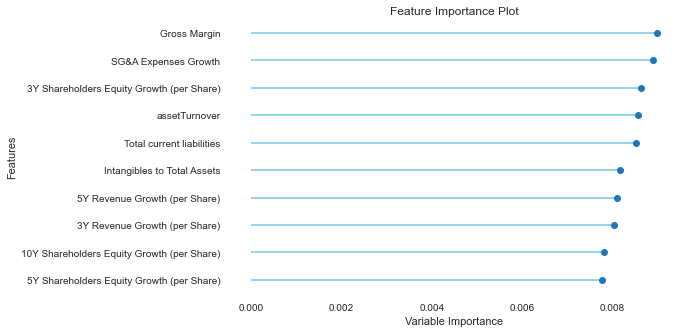

In [29]:
plot_model(estimator = et_model, plot = 'feature')

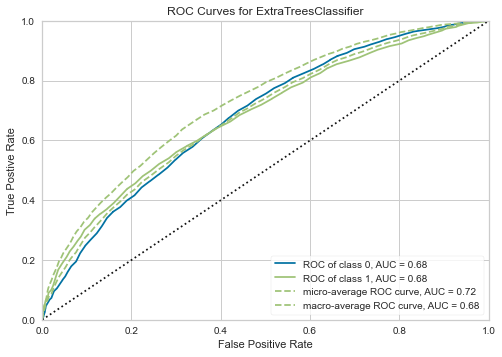

In [30]:
plot_model(estimator = et_model, plot = 'auc')

In [38]:
evaluate_model(et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

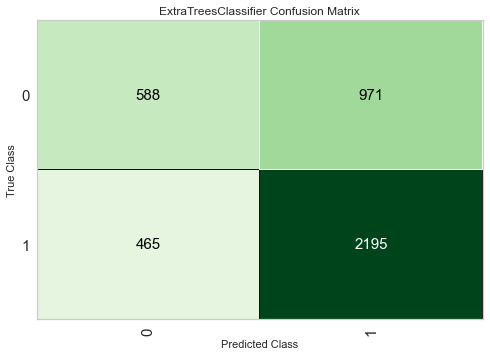

In [36]:
plot_model(estimator = et_model, plot = 'confusion_matrix')

In [31]:
rf_model=create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6274,0.6433,0.7037,0.7048,0.7043,0.2008,0.2008
1,0.6315,0.6359,0.7053,0.7087,0.7070,0.2104,0.2105
2,0.6081,0.6194,0.7118,0.6810,0.6961,0.1454,0.1457
3,0.6250,0.6367,0.7129,0.6983,0.7055,0.1896,0.1897
4,0.6179,0.6353,0.6887,0.7000,0.6943,0.1849,0.1850
5,0.6087,0.6396,0.6742,0.6955,0.6847,0.1696,0.1698
6,0.6453,0.6789,0.7097,0.7225,0.7160,0.2439,0.2439
7,0.6138,0.6250,0.7005,0.6916,0.6960,0.1668,0.1668
8,0.6301,0.6530,0.7150,0.7036,0.7093,0.2010,0.2010
9,0.6372,0.6416,0.7359,0.7031,0.7191,0.2077,0.2081


In [32]:
pred_rf = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6473,0.6775,0.7256,0.718,0.7218,0.2402,0.2403


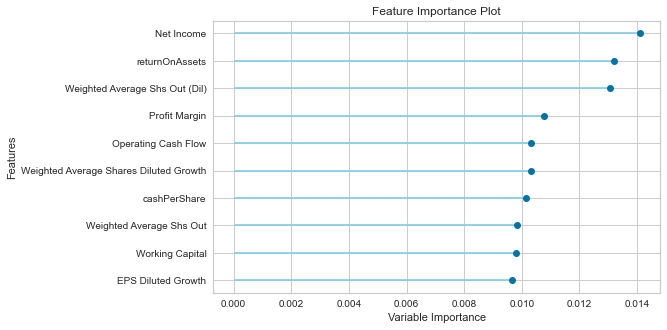

In [33]:
plot_model(estimator = rf_model, plot = 'feature')

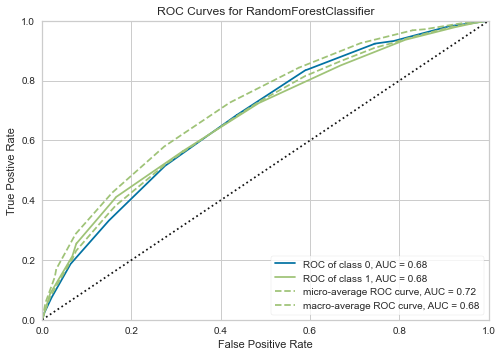

In [34]:
plot_model(estimator = rf_model, plot = 'auc')

In [37]:
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

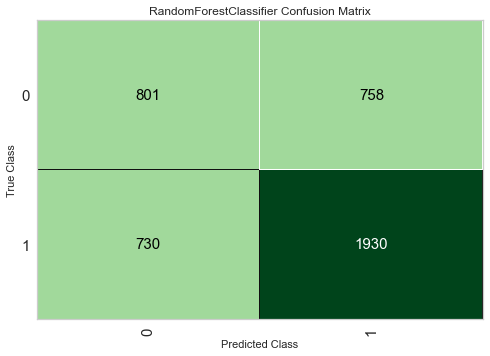

In [35]:
plot_model(estimator = rf_model, plot = 'confusion_matrix')

In [48]:
#stacking 2 models
blend = blend_models(estimator_list=[lgbm_model,cb_model], method = 'soft')

SystemExit: (Type Error): CatBoost Classifier not supported in this function.

In [ ]:
plot_model(blend, plot='auc')

In [ ]:
plot_model(estimator = blend, plot = 'confusion_matrix')

In [ ]:
plot_model(estimator = blend, plot = 'feature')

In [ ]:
pred_blend = predict_model(blend, data=test2)

In [ ]:
pred_blend

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(test['Class'], pred_blend['Label']))

In [ ]:
tuned_blend = tune_model('et')